<h1>Contextualización</h1>

En este cuaderno se estudia la composición sonora de la voz principalmente basado en [GENERACIÓN DE AUDIO A PARTIR DE LENGUAJE NATURAL](https://calebrascon.info/pubre/ThesisMas.2024.Music.pdf)

In [40]:
import librosa
import numpy as np
from IPython.display import Audio
import seaborn as sns
import matplotlib.pyplot as plt

Procedo a cargar el audio, tener en cuenta que con la librería **librosa** es necesario pasar como argumento ```None``` al parámetro ```sr``` ***(sample rate)*** para poder tener el sample rate original del audio.

In [41]:
audio, sr = librosa.load('Audio.ogg', sr = None) # Default sr --> 22050

print(f'Longitud de audio: {len(audio)}')
print(f'Sample Rate: {sr}')
print(f'Duración del audio: {len(audio)/sr}')

Longitud de audio: 192285
Sample Rate: 16000
Duración del audio: 12.0178125


In [42]:
audio

array([ 0.        ,  0.        ,  0.        , ..., -0.0027771 ,
       -0.00015259,  0.00283813], dtype=float32)

En este caso, librosa indica que el audio tiene un total de $16.000$ muestras por segundo y una duración total aproximada de 12 segundos.

In [4]:
Audio(data = audio, rate = sr)

(0.0, 192385.0)

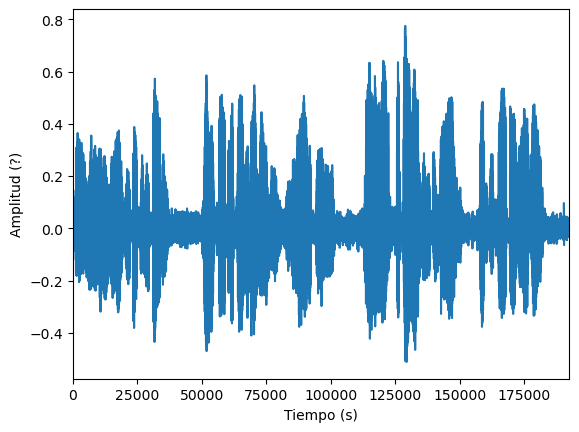

In [27]:
sns.lineplot(audio)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (?)')
plt.xlim([0,len(audio)+100])

### RMS y Envolvente de amplitud

Longitud de audio: 192285 muestras
Sample Rate: 16000 Hz
Duración del audio: 12.0178125 segundos


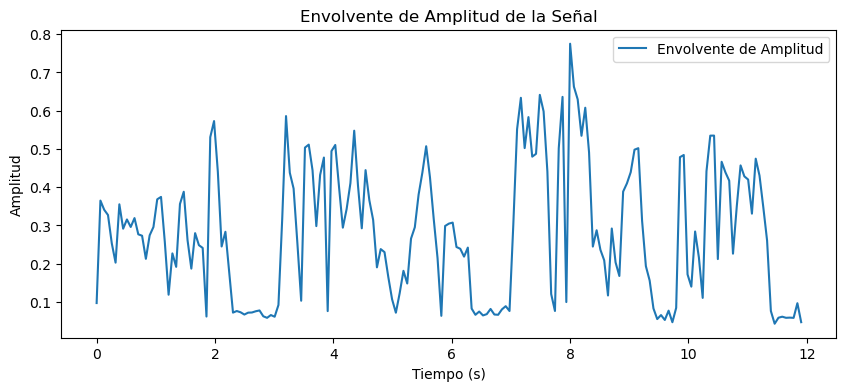

In [24]:
import librosa
import matplotlib.pyplot as plt

# Función para calcular la envolvente de amplitud de un frame específico
def amplitude_envelope_frame(signal, frame_size, frame_idx):
    """
    Calcula la envolvente de amplitud para un frame específico de una señal.
    
    :param signal: La señal de audio (array de amplitudes).
    :param frame_size: Tamaño de cada frame (en muestras).
    :param frame_idx: Índice del frame para el cual calcular la envolvente.
    :return: Envolvente de amplitud (AE) del frame.
    """
    start_idx = frame_idx * frame_size
    end_idx = (frame_idx + 1) * frame_size
    frame = signal[start_idx:end_idx]
    AE = max(abs(frame))
    return AE

# Función para calcular la envolvente de amplitud para toda la señal
def amplitude_envelope_signal(signal, frame_size):
    """
    Calcula la envolvente de amplitud para toda la señal dividiéndola en frames.
    
    :param signal: La señal de audio (array de amplitudes).
    :param frame_size: Tamaño de cada frame (en muestras).
    :return: Un array con la envolvente de amplitud para cada frame.
    """
    num_frames = len(signal) // frame_size
    amplitude_envelopes = [
        amplitude_envelope_frame(signal, frame_size, i) for i in range(num_frames)
    ]
    return amplitude_envelopes

# Función para graficar la envolvente de amplitud
def plot_amplitude_envelope(signal, frame_size, sample_rate):
    """
    Calcula y grafica la envolvente de amplitud de una señal.
    
    :param signal: La señal de audio (array de amplitudes).
    :param frame_size: Tamaño de cada frame (en muestras).
    :param sample_rate: Tasa de muestreo de la señal (en Hz).
    """
    amplitude_envelopes = amplitude_envelope_signal(signal, frame_size)
    time = [frame_size * i / sample_rate for i in range(len(amplitude_envelopes))]

    plt.figure(figsize=(10, 4))
    plt.plot(time, amplitude_envelopes, label='Envolvente de Amplitud')
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Amplitud')
    plt.title('Envolvente de Amplitud de la Señal')
    plt.legend()
    plt.show()

# Cargar el audio
audio, sr = librosa.load('Audio.ogg', sr=None)

# Información del audio
print(f'Longitud de audio: {len(audio)} muestras')
print(f'Sample Rate: {sr} Hz')
print(f'Duración del audio: {len(audio)/sr} segundos')

# Calcular y graficar la envolvente de amplitud
frame_size = 1024  # Puedes ajustar este valor según necesites
plot_amplitude_envelope(audio, frame_size, sr)


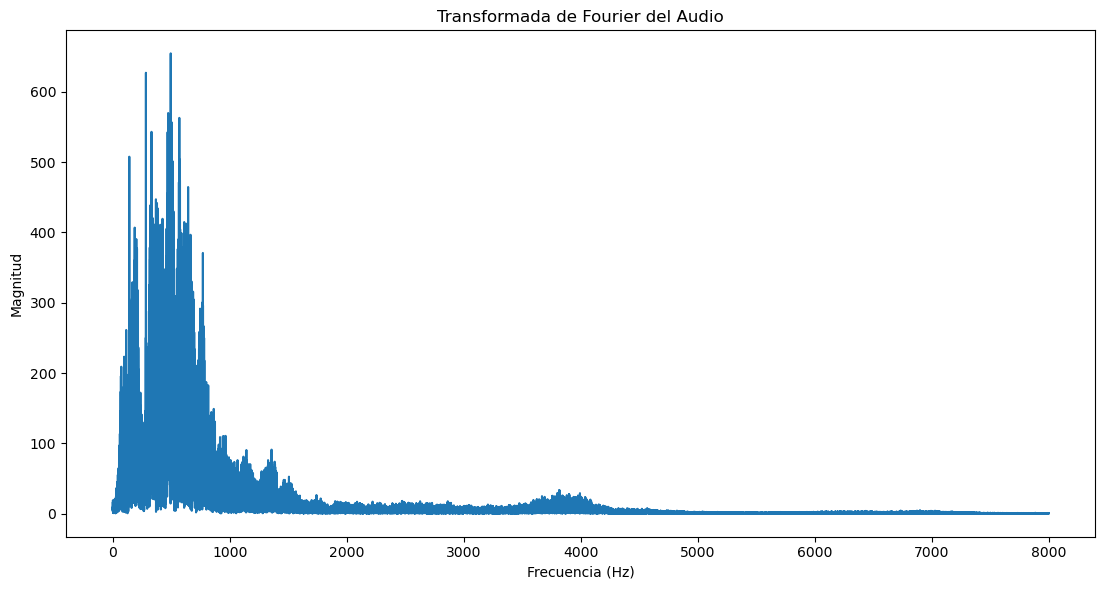

In [39]:
# Aplicar la Transformada de Fourier
audio_fft = np.fft.fft(audio)
frequencies = np.fft.fftfreq(len(audio), 1/sr)


plt.figure(figsize=(6*3.6, 6))

# Señal en el dominio de la frecuencia
plt.subplot(1, 2, 2)
plt.plot(frequencies[:len(frequencies)//2], np.abs(audio_fft)[:len(frequencies)//2])
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.title('Transformada de Fourier del Audio')

# Mostrar las gráficas
plt.tight_layout()
plt.show()